# Property Rent Calculator - Regression Model

This notebook will be used to create a regression model for the Property Rent Calculator Project, using the dataset treated in the last step, using Pandas, NumPy, and Scikit-learn libraries.

In [162]:
# importing libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Using GitHuB API to import the data on the CSV file.

In [163]:
!curl --remote-name \
     -H 'Accept: application/vnd.github.v3.raw' \
     --location https://raw.githubusercontent.com/antunes-lima/Property-Rent-Calculator/main/2%20-%20Data%20Manipulation%20And%20Cleansing%20-%20Pandas%20And%20Numpy/property-rent-calculator-clean-data.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  152k  100  152k    0     0  5274k      0 --:--:-- --:--:-- --:--:-- 5463k


# Exploring The Dataset

Taking the data to a DataFrame.

In [164]:
df = pd.read_csv('/content/property-rent-calculator-clean-data.csv')

df.head()

,Unnamed: 0,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood
0,0,2.550,72,Apartamento,3.0,1.0,2.0,AGUAS CLARAS
1,1,2.400,76,Apartamento,3.0,1.0,1.0,AGUAS CLARAS
2,2,750,48,Apartamento,2.0,1.0,1.0,VALPARAISO DE GOIAS
3,3,2.200,44,Apartamento,1.0,1.0,1.0,AGUAS CLARAS
4,4,1.400,32,Apartamento,1.0,1.0,1.0,AGUAS CLARAS


In [165]:
df = df.drop('Unnamed: 0', axis=1)

df.head()

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood
0,2.550,72,Apartamento,3.0,1.0,2.0,AGUAS CLARAS
1,2.400,76,Apartamento,3.0,1.0,1.0,AGUAS CLARAS
2,750,48,Apartamento,2.0,1.0,1.0,VALPARAISO DE GOIAS
3,2.200,44,Apartamento,1.0,1.0,1.0,AGUAS CLARAS
4,1.400,32,Apartamento,1.0,1.0,1.0,AGUAS CLARAS


In [166]:
df.shape

(3725, 7)

In [167]:
df.dtypes

rent              object
size_m2            int64
property_type     object
bedrooms         float64
suite            float64
parking          float64
neighborhood      object
dtype: object

In [168]:
df.rent.value_counts()

1.100     171
1.200     146
1.000     143
800       128
1.500     126
         ... 
12.800      1
2.510       1
775         1
4.999       1
520         1
Name: rent, Length: 325, dtype: int64

In [169]:
df['rent'] = df['rent'].str.replace('.', '', regex=False)

In [170]:
df.rent.value_counts()

1100     171
1200     146
1000     143
800      128
1500     126
        ... 
12800      1
2510       1
775        1
4999       1
520        1
Name: rent, Length: 325, dtype: int64

In [171]:
df['rent'] = df.rent.astype('int32')

Checking overall info about the values on each numerical column.

In [172]:
df.describe()

,rent,size_m2,bedrooms,suite,parking
count,3.725000e+03,3725.000000,3720.000000,2517.000000,1335.000000
mean,4.836279e+03,65.197315,1.841398,1.137068,1.346816
std,7.479553e+04,50.282302,1.082808,0.476687,0.699338
min,3.500000e+02,0.000000,1.000000,1.000000,1.000000
25%,1.000000e+03,34.000000,1.000000,1.000000,1.000000
50%,1.600000e+03,51.000000,2.000000,1.000000,1.000000
75%,3.000000e+03,76.000000,2.000000,1.000000,2.000000
max,3.850000e+06,1100.000000,38.000000,4.000000,10.000000


Checking and dropping 0 m² rows.

In [173]:
df.loc[df['size_m2'] == 0]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood
394,4200,0,Apartamento,1.0,1.0,NaN,ASA NORTE
559,1400,0,Apartamento,2.0,1.0,NaN,GAMA
1015,1400,0,Apartamento,2.0,1.0,NaN,GAMA
2197,2110,0,Apartamento,2.0,1.0,1.0,GAMA
3035,1400,0,Apartamento,2.0,1.0,NaN,GAMA
3613,1400,0,Apartamento,2.0,1.0,NaN,GAMA


In [174]:
df = df[df.size_m2 != 0]

In [175]:
df.describe()

,rent,size_m2,bedrooms,suite,parking
count,3.719000e+03,3719.000000,3714.000000,2511.000000,1334.000000
mean,4.840879e+03,65.302501,1.841411,1.137395,1.347076
std,7.485575e+04,50.254545,1.083579,0.477209,0.699536
min,3.500000e+02,1.000000,1.000000,1.000000,1.000000
25%,1.000000e+03,34.000000,1.000000,1.000000,1.000000
50%,1.600000e+03,51.000000,2.000000,1.000000,1.000000
75%,3.000000e+03,77.000000,2.000000,1.000000,2.000000
max,3.850000e+06,1100.000000,38.000000,4.000000,10.000000


Doing the same step for 1 m² rows.

In [176]:
df.loc[df['size_m2'] == 1]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood
1568,375,1,Kitnet,1.0,NaN,NaN,CEILANDIA
2203,900,1,Kitnet,1.0,1.0,NaN,GUARA


In [177]:
df = df[df.size_m2 != 1]

In [178]:
df.describe()

,rent,size_m2,bedrooms,suite,parking
count,3.717000e+03,3717.000000,3712.000000,2510.000000,1334.000000
mean,4.843141e+03,65.337100,1.841864,1.137450,1.347076
std,7.487583e+04,50.245915,1.083694,0.477296,0.699536
min,3.500000e+02,11.000000,1.000000,1.000000,1.000000
25%,1.000000e+03,34.000000,1.000000,1.000000,1.000000
50%,1.600000e+03,51.000000,2.000000,1.000000,1.000000
75%,3.000000e+03,77.000000,2.000000,1.000000,2.000000
max,3.850000e+06,1100.000000,38.000000,4.000000,10.000000


Doing the same step for the 1100 m² row. This one seems to be a typo.

In [179]:
df.loc[df['size_m2'] == 1100]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood
1486,4700,1100,Apartamento,3.0,1.0,NaN,ASA NORTE


In [180]:
df = df[df.size_m2 != 1100]

In [181]:
df.describe()

,rent,size_m2,bedrooms,suite,parking
count,3.716000e+03,3716.000000,3711.000000,2509.000000,1334.000000
mean,4.843179e+03,65.058665,1.841552,1.137505,1.347076
std,7.488591e+04,47.297891,1.083674,0.477384,0.699536
min,3.500000e+02,11.000000,1.000000,1.000000,1.000000
25%,1.000000e+03,34.000000,1.000000,1.000000,1.000000
50%,1.600000e+03,51.000000,2.000000,1.000000,1.000000
75%,3.000000e+03,77.000000,2.000000,1.000000,2.000000
max,3.850000e+06,900.000000,38.000000,4.000000,10.000000


Dropping rent per size strange values.

In [182]:
df['rent_per_size'] = df['rent'] / df['size_m2']

In [183]:
df.loc[df['rent_per_size'] > 150]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood,rent_per_size
53,2400,11,Apartamento,2.0,1.0,1.0,AGUAS CLARAS,218.181818
74,70900,121,Apartamento,4.0,2.0,NaN,SETOR INDUSTRIAL,585.950413
319,191900,45,Apartamento,2.0,1.0,NaN,RECANTO DAS EMAS,4264.444444
781,650000,47,Apartamento,2.0,1.0,NaN,PARK SUL,13829.787234
1214,198000,50,Apartamento,2.0,1.0,NaN,SAMAMBAIA,3960.000000
1294,285000,55,Apartamento,2.0,NaN,NaN,SOBRADINHO,5181.818182
1546,249000,200,Kitnet,6.0,NaN,NaN,CEILANDIA,1245.000000
1973,350000,35,Kitnet,8.0,NaN,NaN,CEILANDIA,10000.000000
2221,220000,54,Apartamento,2.0,NaN,NaN,NUCLEO BANDEIRANTE,4074.074074
2928,290000,44,Apartamento,1.0,NaN,NaN,ASA NORTE,6590.909091


In [184]:
df = df[df.rent_per_size < 1100]

In [185]:
df.loc[df['rent_per_size'] < 10]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood,rent_per_size
736,800,630,Kitnet,1.0,1.0,NaN,ASA NORTE,1.269841
803,1000,110,Apartamento,3.0,1.0,1.0,PLANALTINA,9.090909
1210,1000,200,Apartamento,2.0,NaN,NaN,SAO SEBASTIAO,5.000000
1639,420,45,Apartamento,1.0,NaN,NaN,CEILANDIA,9.333333
1653,500,60,Apartamento,1.0,NaN,NaN,NUCLEO BANDEIRANTE,8.333333
2126,1000,200,Apartamento,2.0,NaN,NaN,SAO SEBASTIAO,5.000000
2336,950,157,Apartamento,1.0,NaN,NaN,TAGUATINGA,6.050955
2760,550,56,Apartamento,2.0,NaN,NaN,VALPARAISO DE GOIAS,9.821429
2986,420,50,Apartamento,1.0,NaN,NaN,SAMAMBAIA,8.400000
3063,420,50,Apartamento,1.0,NaN,NaN,SAMAMBAIA,8.400000


In [186]:
df = df[df.rent_per_size > 6]

In [187]:
df.describe()

,rent,size_m2,bedrooms,suite,parking,rent_per_size
count,3701.000000,3701.000000,3696.000000,2501.000000,1332.000000,3701.000000
mean,2442.732775,64.802486,1.838474,1.136745,1.346096,36.835569
std,2684.682067,46.256198,1.077833,0.474651,0.698528,20.059123
min,350.000000,11.000000,1.000000,1.000000,1.000000,6.050955
25%,1000.000000,34.000000,1.000000,1.000000,1.000000,25.000000
50%,1600.000000,51.000000,2.000000,1.000000,1.000000,34.090909
75%,3000.000000,76.000000,2.000000,1.000000,2.000000,43.970588
max,70900.000000,900.000000,38.000000,4.000000,10.000000,585.950413


Checking strange bedrooms value. Nulls will be filled with 0 (bedrooms, suites and parking).

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3701 entries, 0 to 3724
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rent           3701 non-null   int32  
 1   size_m2        3701 non-null   int64  
 2   property_type  3701 non-null   object 
 3   bedrooms       3696 non-null   float64
 4   suite          2501 non-null   float64
 5   parking        1332 non-null   float64
 6   neighborhood   3701 non-null   object 
 7   rent_per_size  3701 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 245.8+ KB


In [191]:
df = df.fillna(0)

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3701 entries, 0 to 3724
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rent           3701 non-null   int32  
 1   size_m2        3701 non-null   int64  
 2   property_type  3701 non-null   object 
 3   bedrooms       3701 non-null   float64
 4   suite          3701 non-null   float64
 5   parking        3701 non-null   float64
 6   neighborhood   3701 non-null   object 
 7   rent_per_size  3701 non-null   float64
dtypes: float64(4), int32(1), int64(1), object(2)
memory usage: 245.8+ KB


In [193]:
df.loc[df['bedrooms'] > 5]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood,rent_per_size
3494,1500,38,Apartamento,38.0,1.0,0.0,AGUAS CLARAS,39.473684


In [194]:
df = df[df.bedrooms < 6]

In [195]:
df.describe()

,rent,size_m2,bedrooms,suite,parking,rent_per_size
count,3700.000000,3700.00000,3700.000000,3700.000000,3700.000000,3700.000000
mean,2442.987568,64.80973,1.826216,0.768108,0.484595,36.834856
std,2685.000182,46.26035,0.900761,0.659949,0.770173,20.061788
min,350.000000,11.00000,0.000000,0.000000,0.000000,6.050955
25%,1000.000000,34.00000,1.000000,0.000000,0.000000,25.000000
50%,1600.000000,51.00000,2.000000,1.000000,0.000000,34.090909
75%,3000.000000,76.00000,2.000000,1.000000,1.000000,43.970588
max,70900.000000,900.00000,5.000000,4.000000,10.000000,585.950413


Checking strange parking value.

In [196]:
df.loc[df['parking'] > 4]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood,rent_per_size
1296,1000,27,Kitnet,1.0,1.0,10.0,ASA NORTE,37.037037
1713,29900,324,Apartamento,3.0,3.0,5.0,NOROESTE,92.283951


In [197]:
df = df[df.parking < 6]

In [198]:
df.describe()

,rent,size_m2,bedrooms,suite,parking,rent_per_size
count,3699.000000,3699.000000,3699.00000,3699.000000,3699.000000,3699.000000
mean,2443.377670,64.819951,1.82644,0.768045,0.482022,36.834801
std,2685.258321,46.262426,0.90078,0.660027,0.754212,20.064500
min,350.000000,11.000000,0.00000,0.000000,0.000000,6.050955
25%,1000.000000,34.000000,1.00000,0.000000,0.000000,25.000000
50%,1600.000000,51.000000,2.00000,1.000000,0.000000,34.090909
75%,3000.000000,76.000000,2.00000,1.000000,1.000000,43.970588
max,70900.000000,900.000000,5.00000,4.000000,5.000000,585.950413


Checking strange size value.

In [199]:
df.loc[df['size_m2'] > 400]

,rent,size_m2,property_type,bedrooms,suite,parking,neighborhood,rent_per_size
111,27500,461,Apartamento,3.0,3.0,4.0,ASA NORTE,59.652928
3209,45000,900,Apartamento,4.0,4.0,3.0,ASA SUL,50.000000


Checking the histograms of the numerical columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5031333f90>,
      dtype=object)

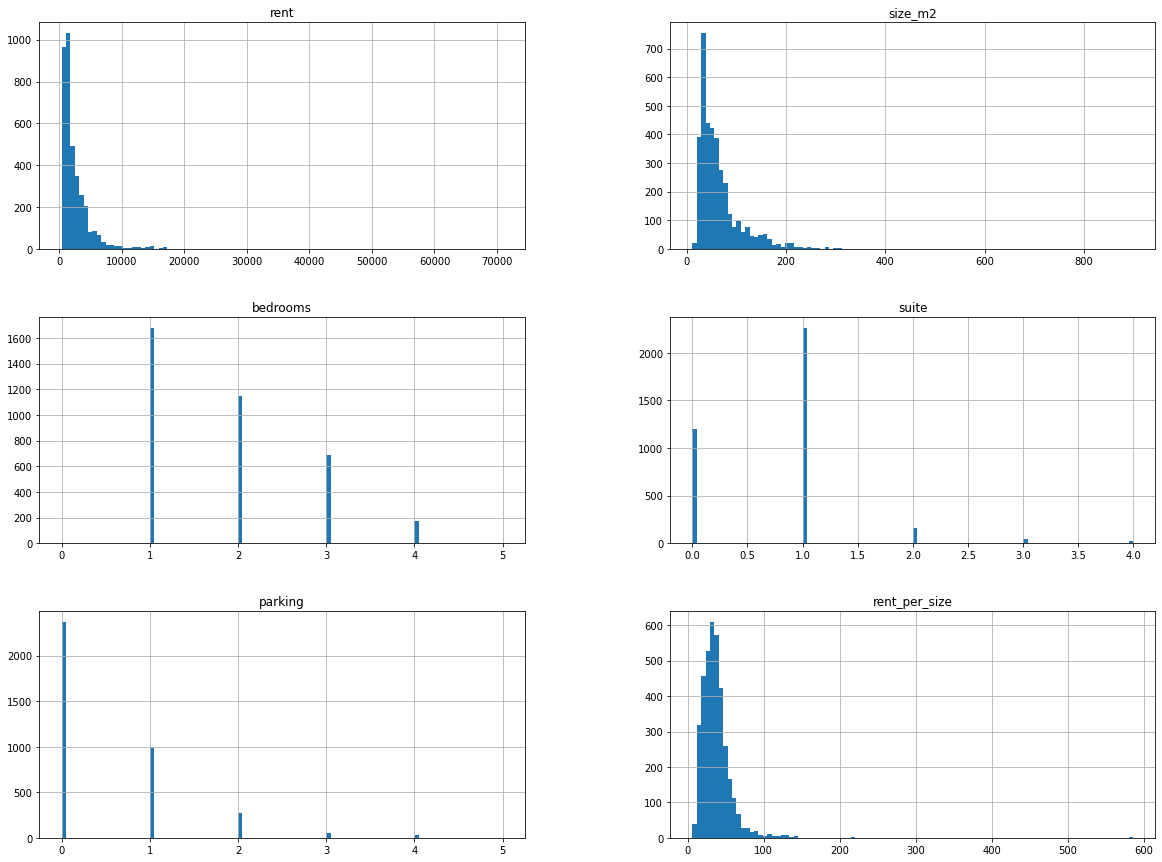

In [200]:
df.hist(bins=100,
        figsize=(20,15) )

Checking the neighborhood value counts. Some values have a pretty low amount, so they will be grouped together as an "Others" category.

In [201]:
df['neighborhood'].value_counts()

 ASA NORTE               679
 AGUAS CLARAS            661
 ASA SUL                 394
 SUDOESTE                341
 GUARA                   291
 TAGUATINGA              240
 NOROESTE                172
 LAGO NORTE              151
 SAMAMBAIA               106
 NUCLEO BANDEIRANTE       87
 PARK SUL                 79
 CEILANDIA                64
 RIACHO FUNDO             60
 SOBRADINHO               52
 CRUZEIRO                 49
 VICENTE PIRES            41
 JARDINS MANGUEIRAL       39
 OCTOGONAL                31
 GAMA                     30
 VALPARAISO DE GOIAS      30
 PLANALTINA               18
 SANTA MARIA              17
 RECANTO DAS EMAS         13
 SAO SEBASTIAO            12
 JARDIM BOTANICO           8
 SETOR INDUSTRIAL          6
 LAGO SUL                  4
 PARK WAY                  4
 PARANOA                   4
 VILA PLANALTO             3
 VARJAO                    3
 SIG                       2
 CANDANGOLANDIA            2
 VILA ESTRUTURAL           2
 BRAZLANDIA   

In [202]:
df.groupby('neighborhood')['rent_per_size'].median().sort_values(ascending=False)

neighborhood
 NOROESTE                57.338825
 PARK SUL                57.142857
 SETOR INDUSTRIAL        52.098214
 PARK WAY                43.496503
 SUDOESTE                41.666667
 LAGO SUL                40.454545
 ASA SUL                 38.888889
 OCTOGONAL               38.461538
 LAGO NORTE              38.333333
 ASA NORTE               37.837838
 AGUAS CLARAS            35.135135
 JARDINS MANGUEIRAL      34.000000
 CRUZEIRO                31.666667
 JARDIM BOTANICO         29.160998
 VILA PLANALTO           26.000000
 GUARA                   25.312500
 VARJAO                  23.300000
 SIG                     23.214286
 VILA DA TELEBRASILIA    22.857143
 SOBRADINHO              22.792208
 VICENTE PIRES           21.818182
 VILA ESTRUTURAL         21.666667
 SAMAMBAIA               21.490148
 TAGUATINGA              21.483516
 CANDANGOLANDIA          21.388889
 RECANTO DAS EMAS        20.000000
 RIACHO FUNDO            20.000000
 SAO SEBASTIAO           19.844075
 CEILAN

These columns have few rows, and also similar rent per size values, to they will be grouped in a single category. "VALPARAISO DE GOIAS" will also be joined because of very similar rent per size value.

In [217]:
 #PLANALTINA               18
 #SANTA MARIA              17
 #PARANOA                   4
 #BRAZLANDIA                1
 #LUZIANIA                  1
 #FORMOSA                   1
df['neighborhood'] = df['neighborhood'].str.replace('PLANALTINA', 'TIER_1', regex=False)
df['neighborhood'] = df['neighborhood'].str.replace('SANTA MARIA', 'TIER_1', regex=False)
df['neighborhood'] = df['neighborhood'].str.replace('PARANOA', 'TIER_1', regex=False)
df['neighborhood'] = df['neighborhood'].str.replace('BRAZLANDIA', 'TIER_1', regex=False)
df['neighborhood'] = df['neighborhood'].str.replace('LUZIANIA', 'TIER_1', regex=False)
df['neighborhood'] = df['neighborhood'].str.replace('FORMOSA', 'TIER_1', regex=False)
df['neighborhood'] = df['neighborhood'].str.replace('VALPARAISO DE GOIAS', 'TIER_1', regex=False)

In [218]:
df['neighborhood'].value_counts()

 ASA NORTE             679
 AGUAS CLARAS          661
 ASA SUL               394
 SUDOESTE              341
 GUARA                 291
 TAGUATINGA            240
 NOROESTE              172
 LAGO NORTE            151
 SAMAMBAIA             106
 NUCLEO BANDEIRANTE     87
 PARK SUL               79
 TIER_1                 72
 CEILANDIA              64
 RIACHO FUNDO           60
 SOBRADINHO             52
 CRUZEIRO               49
 VICENTE PIRES          41
 JARDINS MANGUEIRAL     39
 TIER_2                 35
 OCTOGONAL              31
 GAMA                   30
 JARDIM BOTANICO         8
 SETOR INDUSTRIAL        6
 LAGO SUL                4
 PARK WAY                4
 VILA PLANALTO           3
Name: neighborhood, dtype: int64

In [219]:
df.groupby('neighborhood')['rent_per_size'].median().sort_values(ascending=False)

neighborhood
 NOROESTE              57.338825
 PARK SUL              57.142857
 SETOR INDUSTRIAL      52.098214
 PARK WAY              43.496503
 SUDOESTE              41.666667
 LAGO SUL              40.454545
 ASA SUL               38.888889
 OCTOGONAL             38.461538
 LAGO NORTE            38.333333
 ASA NORTE             37.837838
 AGUAS CLARAS          35.135135
 JARDINS MANGUEIRAL    34.000000
 CRUZEIRO              31.666667
 JARDIM BOTANICO       29.160998
 VILA PLANALTO         26.000000
 GUARA                 25.312500
 SOBRADINHO            22.792208
 VICENTE PIRES         21.818182
 SAMAMBAIA             21.490148
 TAGUATINGA            21.483516
 TIER_2                21.000000
 RIACHO FUNDO          20.000000
 CEILANDIA             18.000000
 NUCLEO BANDEIRANTE    17.142857
 GAMA                  16.478261
 TIER_1                14.715909
Name: rent_per_size, dtype: float64

Again, grouping similar neighborhoods that have few rows. "RIACHO FUNDO" Also added here.

In [224]:
 #RECANTO DAS EMAS         13
 #SAO SEBASTIAO            12
 #VARJAO                    3
 #SIG                       2
 #CANDANGOLANDIA            2
 #VILA ESTRUTURAL           2
 #VILA DA TELEBRASILIA      1
 df['neighborhood'] = df['neighborhood'].str.replace('RECANTO DAS EMAS', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('SAO SEBASTIAO', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('VARJAO', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('SIG', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('CANDANGOLANDIA', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('VILA ESTRUTURAL', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('VILA DA TELEBRASILIA', 'TIER_2', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('RIACHO FUNDO', 'TIER_2', regex=False)

In [225]:
df['neighborhood'].value_counts()

 ASA NORTE             679
 AGUAS CLARAS          661
 ASA SUL               394
 SUDOESTE              341
 GUARA                 291
 TAGUATINGA            240
 NOROESTE              172
 LAGO NORTE            151
 SAMAMBAIA             106
 TIER_2                 95
 NUCLEO BANDEIRANTE     87
 PARK SUL               79
 TIER_1                 72
 CEILANDIA              64
 SOBRADINHO             52
 CRUZEIRO               49
 VICENTE PIRES          41
 JARDINS MANGUEIRAL     39
 OCTOGONAL              31
 GAMA                   30
 JARDIM BOTANICO         8
 SETOR INDUSTRIAL        6
 LAGO SUL                4
 PARK WAY                4
 VILA PLANALTO           3
Name: neighborhood, dtype: int64

In [226]:
df.groupby('neighborhood')['rent_per_size'].median().sort_values(ascending=False)

neighborhood
 NOROESTE              57.338825
 PARK SUL              57.142857
 SETOR INDUSTRIAL      52.098214
 PARK WAY              43.496503
 SUDOESTE              41.666667
 LAGO SUL              40.454545
 ASA SUL               38.888889
 OCTOGONAL             38.461538
 LAGO NORTE            38.333333
 ASA NORTE             37.837838
 AGUAS CLARAS          35.135135
 JARDINS MANGUEIRAL    34.000000
 CRUZEIRO              31.666667
 JARDIM BOTANICO       29.160998
 VILA PLANALTO         26.000000
 GUARA                 25.312500
 SOBRADINHO            22.792208
 VICENTE PIRES         21.818182
 SAMAMBAIA             21.490148
 TAGUATINGA            21.483516
 TIER_2                20.000000
 CEILANDIA             18.000000
 NUCLEO BANDEIRANTE    17.142857
 GAMA                  16.478261
 TIER_1                14.715909
Name: rent_per_size, dtype: float64

In [229]:
 df['neighborhood'] = df['neighborhood'].str.replace('CEILANDIA', 'TIER_3', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('NUCLEO BANDEIRANTE', 'TIER_3', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('GAMA', 'TIER_3', regex=False)
 
 #VILA PLANALTO             3
 df['neighborhood'] = df['neighborhood'].str.replace('VILA PLANALTO', 'TIER_4', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('GUARA', 'TIER_4', regex=False)

 #JARDIM BOTANICO           8
 df['neighborhood'] = df['neighborhood'].str.replace('JARDIM BOTANICO', 'TIER_5', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('CRUZEIRO', 'TIER_5', regex=False)

 #SETOR INDUSTRIAL          6
 #LAGO SUL                  4
 #PARK WAY                  4
 df['neighborhood'] = df['neighborhood'].str.replace('SETOR INDUSTRIAL', 'TIER_6', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('LAGO SUL', 'TIER_6', regex=False)
 df['neighborhood'] = df['neighborhood'].str.replace('PARK WAY', 'TIER_6', regex=False)

In [230]:
df['neighborhood'].value_counts()

 ASA NORTE             679
 AGUAS CLARAS          661
 ASA SUL               394
 SUDOESTE              341
 TIER_4                294
 TAGUATINGA            240
 TIER_3                181
 NOROESTE              172
 LAGO NORTE            151
 SAMAMBAIA             106
 TIER_2                 95
 PARK SUL               79
 TIER_1                 72
 TIER_5                 57
 SOBRADINHO             52
 VICENTE PIRES          41
 JARDINS MANGUEIRAL     39
 OCTOGONAL              31
 TIER_6                 14
Name: neighborhood, dtype: int64

In [231]:
df.groupby('neighborhood')['rent_per_size'].median().sort_values(ascending=False)

neighborhood
 NOROESTE              57.338825
 PARK SUL              57.142857
 SUDOESTE              41.666667
 TIER_6                41.223776
 ASA SUL               38.888889
 OCTOGONAL             38.461538
 LAGO NORTE            38.333333
 ASA NORTE             37.837838
 AGUAS CLARAS          35.135135
 JARDINS MANGUEIRAL    34.000000
 TIER_5                31.147541
 TIER_4                25.404172
 SOBRADINHO            22.792208
 VICENTE PIRES         21.818182
 SAMAMBAIA             21.490148
 TAGUATINGA            21.483516
 TIER_2                20.000000
 TIER_3                17.307692
 TIER_1                14.715909
Name: rent_per_size, dtype: float64

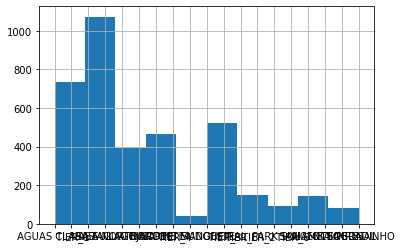

In [232]:
df['neighborhood'].hist()

In [233]:
df['neighborhood'].value_counts(normalize=True)

 ASA NORTE             0.183563
 AGUAS CLARAS          0.178697
 ASA SUL               0.106515
 SUDOESTE              0.092187
 TIER_4                0.079481
 TAGUATINGA            0.064882
 TIER_3                0.048932
 NOROESTE              0.046499
 LAGO NORTE            0.040822
 SAMAMBAIA             0.028656
 TIER_2                0.025683
 PARK SUL              0.021357
 TIER_1                0.019465
 TIER_5                0.015410
 SOBRADINHO            0.014058
 VICENTE PIRES         0.011084
 JARDINS MANGUEIRAL    0.010543
 OCTOGONAL             0.008381
 TIER_6                0.003785
Name: neighborhood, dtype: float64

Creating stratified train/test split, using the neighboorhood column. This guarantees that we maitain the original data set neighborhood distribution, especially because we have some neighborhoods with few values.

In [234]:
df_strat_train, df_strat_test = train_test_split(df,
                                                 random_state=27,
                                                 test_size=0.2,
                                                 stratify=df['neighborhood'])

In [235]:
df_strat_train['neighborhood'].value_counts(normalize=True)

 ASA NORTE             0.183508
 AGUAS CLARAS          0.178777
 ASA SUL               0.106455
 SUDOESTE              0.092261
 TIER_4                0.079419
 TAGUATINGA            0.064887
 TIER_3                0.049003
 NOROESTE              0.046299
 LAGO NORTE            0.040892
 SAMAMBAIA             0.028726
 TIER_2                0.025684
 PARK SUL              0.021291
 TIER_1                0.019263
 TIER_5                0.015546
 SOBRADINHO            0.014194
 VICENTE PIRES         0.011152
 JARDINS MANGUEIRAL    0.010477
 OCTOGONAL             0.008449
 TIER_6                0.003717
Name: neighborhood, dtype: float64

In [236]:
df_strat_test['neighborhood'].value_counts(normalize=True)

 ASA NORTE             0.183784
 AGUAS CLARAS          0.178378
 ASA SUL               0.106757
 SUDOESTE              0.091892
 TIER_4                0.079730
 TAGUATINGA            0.064865
 TIER_3                0.048649
 NOROESTE              0.047297
 LAGO NORTE            0.040541
 SAMAMBAIA             0.028378
 TIER_2                0.025676
 PARK SUL              0.021622
 TIER_1                0.020270
 TIER_5                0.014865
 SOBRADINHO            0.013514
 JARDINS MANGUEIRAL    0.010811
 VICENTE PIRES         0.010811
 OCTOGONAL             0.008108
 TIER_6                0.004054
Name: neighborhood, dtype: float64

In [237]:
df_strat_train.shape

(2959, 8)

In [238]:
df_strat_test.shape

(740, 8)

Correlation heatmap.

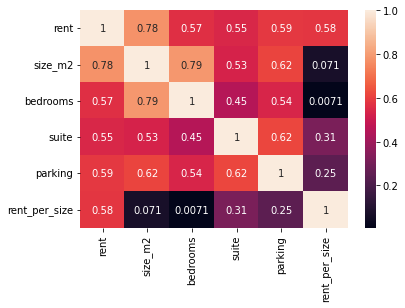

In [239]:
sns.heatmap(df_strat_train.corr(), annot=True)

# Preparing The Data

Creating new combined columns, and checking correlation with it.

In [240]:
df_strat_train['bedrooms_per_size'] = df_strat_train['bedrooms'] / df_strat_train['size_m2']
df_strat_train['suite_per_size'] = df_strat_train['suite'] / df_strat_train['size_m2']
df_strat_train['parking_per_size'] = df_strat_train['parking'] / df_strat_train['size_m2']

df_strat_test['bedrooms_per_size'] = df_strat_test['bedrooms'] / df_strat_test['size_m2']
df_strat_test['suite_per_size'] = df_strat_test['suite'] / df_strat_test['size_m2']
df_strat_test['parking_per_size'] = df_strat_test['parking'] / df_strat_test['size_m2']

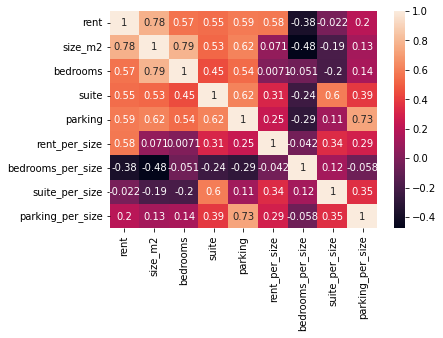

In [241]:
sns.heatmap(df_strat_train.corr(), annot=True)

In [242]:
df_strat_train.corr()['rent'].sort_values(ascending=False)

rent                 1.000000
size_m2              0.775137
parking              0.587558
rent_per_size        0.583269
bedrooms             0.567055
suite                0.545104
parking_per_size     0.197988
suite_per_size      -0.022313
bedrooms_per_size   -0.376771
Name: rent, dtype: float64

Spliting the train and test sets into a X and Y sets. Y refers to the value we are going to predict, rent value, and X refers to the others columns besides it.

In [243]:
x_train = df_strat_train.drop('rent', axis=1)
y_train = df_strat_train['rent']

x_test = df_strat_test.drop('rent', axis=1)
y_test = df_strat_test['rent']

In [244]:
x_train.shape

(2959, 10)

In [245]:
x_test.shape

(740, 10)

In [246]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2959 entries, 39 to 2401
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   size_m2            2959 non-null   int64  
 1   property_type      2959 non-null   object 
 2   bedrooms           2959 non-null   float64
 3   suite              2959 non-null   float64
 4   parking            2959 non-null   float64
 5   neighborhood       2959 non-null   object 
 6   rent_per_size      2959 non-null   float64
 7   bedrooms_per_size  2959 non-null   float64
 8   suite_per_size     2959 non-null   float64
 9   parking_per_size   2959 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 254.3+ KB


In [247]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 2339 to 2656
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   size_m2            740 non-null    int64  
 1   property_type      740 non-null    object 
 2   bedrooms           740 non-null    float64
 3   suite              740 non-null    float64
 4   parking            740 non-null    float64
 5   neighborhood       740 non-null    object 
 6   rent_per_size      740 non-null    float64
 7   bedrooms_per_size  740 non-null    float64
 8   suite_per_size     740 non-null    float64
 9   parking_per_size   740 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 63.6+ KB


Transforming categorical columns. In this case, the neighborhood and property_type columns.

In [248]:
x_train.neighborhood.value_counts()

 ASA NORTE             543
 AGUAS CLARAS          529
 ASA SUL               315
 SUDOESTE              273
 TIER_4                235
 TAGUATINGA            192
 TIER_3                145
 NOROESTE              137
 LAGO NORTE            121
 SAMAMBAIA              85
 TIER_2                 76
 PARK SUL               63
 TIER_1                 57
 TIER_5                 46
 SOBRADINHO             42
 VICENTE PIRES          33
 JARDINS MANGUEIRAL     31
 OCTOGONAL              25
 TIER_6                 11
Name: neighborhood, dtype: int64

In [249]:
x_train = pd.get_dummies(x_train)

x_test = pd.get_dummies(x_test)

Scalling the data. Robust scaler will be used here, as we have outliers. Standard scaler would not deal well with these outliers.

In [250]:
x_train.describe()

,size_m2,bedrooms,suite,parking,rent_per_size,bedrooms_per_size,suite_per_size,parking_per_size,property_type_Apartamento,property_type_Kitnet,...,neighborhood_ SOBRADINHO,neighborhood_ SUDOESTE,neighborhood_ TAGUATINGA,neighborhood_ TIER_1,neighborhood_ TIER_2,neighborhood_ TIER_3,neighborhood_ TIER_4,neighborhood_ TIER_5,neighborhood_ TIER_6,neighborhood_ VICENTE PIRES
count,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,...,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000
mean,65.272051,1.838121,0.770531,0.487327,36.971802,0.031081,0.013542,0.006506,0.818520,0.181480,...,0.014194,0.092261,0.064887,0.019263,0.025684,0.049003,0.079419,0.015546,0.003717,0.011152
std,46.898636,0.907757,0.669834,0.766364,20.502542,0.008536,0.012744,0.010355,0.385481,0.385481,...,0.118310,0.289443,0.246368,0.137472,0.158219,0.215911,0.270437,0.123731,0.060868,0.105032
min,11.000000,0.000000,0.000000,0.000000,6.050955,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,1.000000,0.000000,0.000000,25.000000,0.025000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,52.000000,2.000000,1.000000,0.000000,34.210526,0.031250,0.012500,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,2.000000,1.000000,1.000000,44.000000,0.036364,0.021277,0.012195,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,900.000000,5.000000,4.000000,5.000000,585.950413,0.090909,0.090909,0.068966,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [251]:
x_train.columns

Index(['size_m2', 'bedrooms', 'suite', 'parking', 'rent_per_size',
       'bedrooms_per_size', 'suite_per_size', 'parking_per_size',
       'property_type_Apartamento ', 'property_type_Kitnet ',
       'neighborhood_ AGUAS CLARAS', 'neighborhood_ ASA NORTE',
       'neighborhood_ ASA SUL', 'neighborhood_ JARDINS MANGUEIRAL',
       'neighborhood_ LAGO NORTE', 'neighborhood_ NOROESTE',
       'neighborhood_ OCTOGONAL', 'neighborhood_ PARK SUL',
       'neighborhood_ SAMAMBAIA', 'neighborhood_ SOBRADINHO',
       'neighborhood_ SUDOESTE', 'neighborhood_ TAGUATINGA',
       'neighborhood_ TIER_1', 'neighborhood_ TIER_2', 'neighborhood_ TIER_3',
       'neighborhood_ TIER_4', 'neighborhood_ TIER_5', 'neighborhood_ TIER_6',
       'neighborhood_ VICENTE PIRES'],
      dtype='object')

In [256]:
x_train.columns[:8]

Index(['size_m2', 'bedrooms', 'suite', 'parking', 'rent_per_size',
       'bedrooms_per_size', 'suite_per_size', 'parking_per_size'],
      dtype='object')

In [257]:
num_attributes = x_train.columns[:8]

x_train[num_attributes].head()

,size_m2,bedrooms,suite,parking,rent_per_size,bedrooms_per_size,suite_per_size,parking_per_size
39,90,2.0,0.0,0.0,33.333333,0.022222,0.000000,0.0
2246,70,2.0,0.0,0.0,12.142857,0.028571,0.000000,0.0
1591,104,3.0,1.0,0.0,34.615385,0.028846,0.009615,0.0
3633,70,3.0,0.0,0.0,11.428571,0.042857,0.000000,0.0
2286,25,1.0,1.0,0.0,44.000000,0.040000,0.040000,0.0


Transformer fitting, using the training data.

In [258]:
transformer = RobustScaler().fit(x_train[num_attributes])

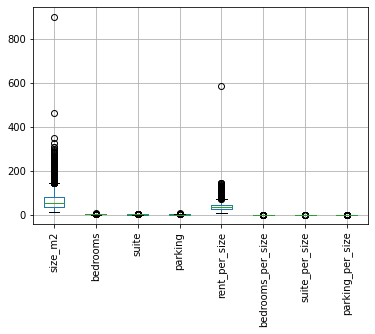

In [259]:
x_train[num_attributes].boxplot(rot=90)

In [260]:
x_train[num_attributes] = transformer.transform(x_train[num_attributes])

x_train.head()

,size_m2,bedrooms,suite,parking,rent_per_size,bedrooms_per_size,suite_per_size,parking_per_size,property_type_Apartamento,property_type_Kitnet,...,neighborhood_ SOBRADINHO,neighborhood_ SUDOESTE,neighborhood_ TAGUATINGA,neighborhood_ TIER_1,neighborhood_ TIER_2,neighborhood_ TIER_3,neighborhood_ TIER_4,neighborhood_ TIER_5,neighborhood_ TIER_6,neighborhood_ VICENTE PIRES
39,0.863636,0.0,-1.0,0.0,-0.046168,-0.794444,-0.587500,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
2246,0.409091,0.0,-1.0,0.0,-1.161456,-0.235714,-0.587500,0.0,1,0,...,0,0,0,1,0,0,0,0,0,0
1591,1.181818,1.0,0.0,0.0,0.021308,-0.211538,-0.135577,0.0,1,0,...,0,0,0,0,0,0,0,0,0,0
3633,0.409091,1.0,-1.0,0.0,-1.199050,1.021429,-0.587500,0.0,1,0,...,0,0,0,0,0,1,0,0,0,0
2286,-0.613636,-1.0,0.0,0.0,0.515235,0.770000,1.292500,0.0,0,1,...,0,0,0,0,0,0,0,0,0,0


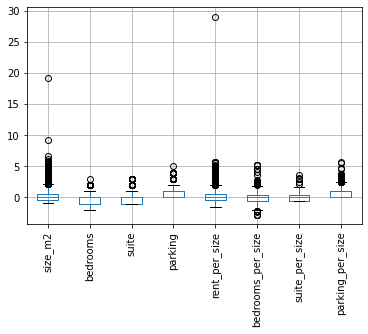

In [261]:
x_train[num_attributes].boxplot(rot=90)

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


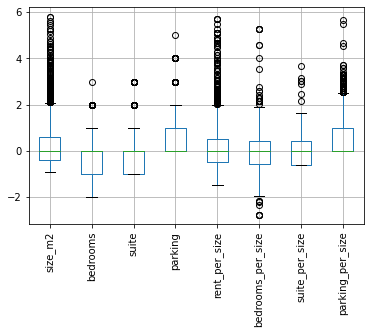

In [264]:
filter_outliers = x_train[num_attributes]<6
x_train[num_attributes][filter_outliers].boxplot(rot=90)

Scalling the test data, also with the transformer fitted using the training data.

In [265]:
x_test[num_attributes] = transformer.transform(x_test[num_attributes])

x_test.head()

,size_m2,bedrooms,suite,parking,rent_per_size,bedrooms_per_size,suite_per_size,parking_per_size,property_type_Apartamento,property_type_Kitnet,...,neighborhood_ SOBRADINHO,neighborhood_ SUDOESTE,neighborhood_ TAGUATINGA,neighborhood_ TIER_1,neighborhood_ TIER_2,neighborhood_ TIER_3,neighborhood_ TIER_4,neighborhood_ TIER_5,neighborhood_ TIER_6,neighborhood_ VICENTE PIRES
2339,-0.045455,0.0,-1.0,0.0,-0.695291,0.770000,-0.587500,0.000000,1,0,...,0,0,0,0,1,0,0,0,0,0
3217,-0.659091,-1.0,-1.0,0.0,0.030110,1.076087,-0.587500,0.000000,0,1,...,0,0,0,0,0,0,0,0,0,0
1026,2.363636,1.0,0.0,1.0,0.021308,-1.057692,-0.286218,0.525641,1,0,...,0,0,0,0,0,0,0,0,0,0
399,0.409091,0.0,0.0,0.0,0.094183,-0.235714,0.083929,0.000000,1,0,...,0,0,0,0,0,0,1,0,0,0
1065,-0.431818,-1.0,-1.0,0.0,-0.524637,-0.083333,-0.587500,0.000000,1,0,...,0,0,0,0,0,0,0,0,0,0


In [266]:
x_test[num_attributes].describe()

,size_m2,bedrooms,suite,parking,rent_per_size,bedrooms_per_size,suite_per_size,parking_per_size
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,0.250276,-0.220270,-0.241892,0.460811,0.109287,-0.004686,0.074496,0.549772
std,0.991122,0.871357,0.619596,0.703619,0.958451,0.900884,0.603978,0.900561
min,-0.931818,-2.000000,-1.000000,0.000000,-1.400554,-2.750000,-0.587500,0.000000
25%,-0.414773,-1.000000,-1.000000,0.000000,-0.484765,-0.550000,-0.587500,0.000000
50%,-0.045455,0.000000,0.000000,0.000000,-0.036695,0.000000,0.030921,0.000000
75%,0.477273,0.000000,0.000000,1.000000,0.497988,0.450000,0.480682,1.025000
max,7.409091,3.000000,3.000000,4.000000,9.682700,13.250000,3.685227,7.454545


# Selecting And Training Models

Linear regression model.

In [267]:
lin_reg = LinearRegression()

In [269]:
lin_reg.fit(x_train, y_train)

LinearRegression()

Linear regression evaluation.

In [270]:
np.sqrt(mean_squared_error(y_train.values,
                           lin_reg.predict(x_train)))

858.2527662172402

In [271]:
np.sqrt(mean_squared_error(y_test.values,
                           lin_reg.predict(x_test)))

781.1271461755618

Decision tree regression model.

In [272]:
tree_reg = DecisionTreeRegressor()

In [273]:
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

Decision tree evaluation. The error being equal to zero here indicates that we have a overfitted model, that won't generalize well.

In [274]:
np.sqrt(mean_squared_error(y_train.values,
                           tree_reg.predict(x_train)))

0.0

In [279]:
np.sqrt(mean_squared_error(y_test.values,
                           tree_reg.predict(x_test)))

263.4925379732177

Random Forest regression model.

In [334]:
rf_reg = RandomForestRegressor()

In [335]:
rf_reg.fit(x_train, y_train)

RandomForestRegressor()

Random forest evaluation.

In [336]:
np.sqrt(mean_squared_error(y_train.values,
                           rf_reg.predict(x_train)))

418.8557652501696

In [337]:
np.sqrt(mean_squared_error(y_test.values,
                           rf_reg.predict(x_test)))

116.82907713430787

Using cross validation to check the overfitting without needing to use the test data.

In [338]:
scores = cross_val_score(lin_reg,
                         x_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)

In [339]:
lin_rmse_scores = np.sqrt(-scores)

In [340]:
np.mean(lin_rmse_scores)

975.8223794943909

In [341]:
np.std(lin_rmse_scores)

354.3615376241616

In [342]:
scores = cross_val_score(tree_reg,
                         x_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)

In [343]:
tree_rmse_scores = np.sqrt(-scores)

In [344]:
np.mean(tree_rmse_scores)

1102.5304561478756

In [345]:
np.std(tree_rmse_scores)

1059.448743680639

In [354]:
scores = cross_val_score(rf_reg,
                         x_train,
                         y_train,
                         scoring='neg_mean_squared_error',
                         cv=5)

In [355]:
rf_rmse_scores = np.sqrt(-scores)

In [356]:
np.mean(rf_rmse_scores)

777.1715829947258

In [357]:
np.std(rf_rmse_scores)

1010.053338168447

# Fine Tuning The Model

Selecting parameters lists to test each combination of them, in order to get the best model parameter calibration.

In [390]:
parameters = {'n_estimators':[10, 20, 30], 'max_features':[8, None], 'max_depth':[6, 8, 10]}
#{'bootstrap':[False], 'n_estimators':[3, 10], 'max_features':[2, 3, 4]}

In [391]:
rf = RandomForestRegressor()

In [392]:
grid_search = GridSearchCV(rf,
                           parameters,
                           cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [393]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [6, 8, 10], 'max_features': [8, None],
                         'n_estimators': [10, 20, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

Checking the best found parameters.

In [394]:
grid_search.best_params_

{'max_depth': 10, 'max_features': None, 'n_estimators': 10}

In [395]:
np.sqrt(-grid_search.best_score_)

1266.2385484951299

Checking the performance of each parameter combination.

In [396]:
cv_res = grid_search.cv_results_

for mean_score, params in zip(cv_res['mean_test_score'],cv_res['params']):
  print(np.sqrt(-mean_score), params)

1507.0329554508733 {'max_depth': 6, 'max_features': 8, 'n_estimators': 10}
1509.6654412400314 {'max_depth': 6, 'max_features': 8, 'n_estimators': 20}
1484.0115968263738 {'max_depth': 6, 'max_features': 8, 'n_estimators': 30}
1310.7002682995485 {'max_depth': 6, 'max_features': None, 'n_estimators': 10}
1306.8812405459146 {'max_depth': 6, 'max_features': None, 'n_estimators': 20}
1287.0171154926602 {'max_depth': 6, 'max_features': None, 'n_estimators': 30}
1403.8515419559035 {'max_depth': 8, 'max_features': 8, 'n_estimators': 10}
1409.345504103374 {'max_depth': 8, 'max_features': 8, 'n_estimators': 20}
1404.2468221711829 {'max_depth': 8, 'max_features': 8, 'n_estimators': 30}
1272.2615758391205 {'max_depth': 8, 'max_features': None, 'n_estimators': 10}
1302.9531639443962 {'max_depth': 8, 'max_features': None, 'n_estimators': 20}
1296.5106069335727 {'max_depth': 8, 'max_features': None, 'n_estimators': 30}
1386.2766446700211 {'max_depth': 10, 'max_features': 8, 'n_estimators': 10}
1376.34

Extracting the best estimator found.

In [397]:
rf_reg_v2 = grid_search.best_estimator_

In [398]:
np.sqrt(mean_squared_error(y_train.values,
                           rf_reg_v2.predict(x_train)))

528.1414162862183

In [399]:
np.sqrt(mean_squared_error(y_test.values,
                           rf_reg_v2.predict(x_test)))

182.27891400489438

Creating Final Model.

In [497]:
rf_reg_v3 = RandomForestRegressor(max_depth=8, max_features=None, n_estimators=40)

In [498]:
rf_reg_v3.fit(x_train, y_train)

RandomForestRegressor(max_depth=8, max_features=None, n_estimators=40)

In [501]:
np.sqrt(mean_squared_error(y_train.values,
                           rf_reg_v3.predict(x_train)))

584.7863553374945

In [502]:
np.sqrt(mean_squared_error(y_test.values,
                           rf_reg_v3.predict(x_test)))

168.67996829779537

In [505]:
rf_reg_v3.predict(x_test.head(20))

array([ 993.74310617,  929.90350768, 5301.64608478, 2507.5378764 ,
        845.02714432, 1387.07676812, 2793.728489  , 1234.41769718,
       1188.48357426, 2875.43081   ,  878.45078053, 2502.39840154,
       3496.8951516 , 1620.53198049, 1540.83805997, 1261.25469734,
       1365.94891564, 3633.84453459, 2906.65945197, 1486.17392429])

In [506]:
y_test.head(20).values

array([1050,  800, 5400, 2520,  800, 1299, 2890, 1300, 1200, 2800,  850,
       2500, 3400, 1650, 1596, 1300, 1400, 3650, 2900, 1500], dtype=int32)

# Exporting the model

In [508]:
from joblib import dump, load

dump(rf_reg_v3, 'property-rent-calc.joblib')

rf_test = load('property-rent-calc.joblib')

np.sqrt(mean_squared_error(y_test,
                           rf_test.predict(x_test)))

168.67996829779537